In [100]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [101]:
dataset = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/Titanic-Dataset/main/Titanic_Dataset.csv")

In [102]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [103]:
dataset = dataset.drop(['PassengerId','Name','Ticket','Cabin'] , axis='columns')

In [104]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,male,NaN,0,0,8.0500,S
1305,1,1,female,39.0,0,0,108.9000,C
1306,0,3,male,38.5,0,0,7.2500,S
1307,0,3,male,NaN,0,0,8.0500,S


In [105]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 81.9+ KB


In [106]:
dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [107]:
dataset.dropna(subset=['Embarked'], inplace=True)

In [108]:
dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      0
dtype: int64

In [109]:
dataset.dropna(subset=['Fare'],inplace=True)

In [110]:
dataset.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [111]:
mean_age = dataset['Age'].mean()
mean_age

29.81320230105465

In [112]:
dataset["Age"].fillna(mean_age, inplace=True)

In [113]:
dataset.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [114]:
dataset.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.813202,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


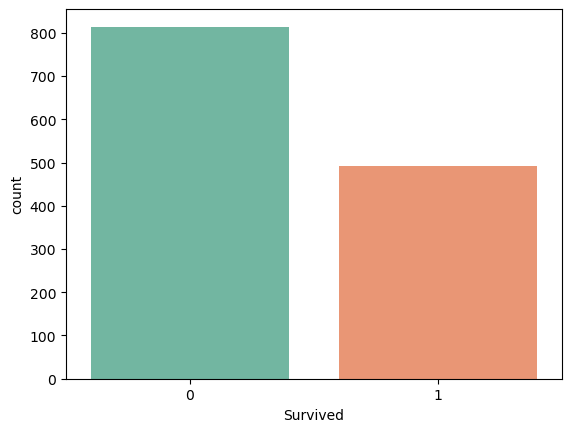

In [115]:
sns.countplot(x = dataset['Survived'], palette= 'Set2');

In [116]:
dataset.groupby('Survived').size()

Survived
0    814
1    492
dtype: int64

In [117]:
from sklearn.utils import resample

df_dead = dataset[(dataset['Survived']== 0)]  
df_alive = dataset[(dataset['Survived']== 1)]
# upsample minority class
df_alive_upsampled = resample(df_alive, 
                                 replace=True,    # sample with replacement
                                 n_samples= 814, # to match majority class
                                 random_state=42)  # reproducible results

ds = pd.concat([df_dead,df_alive_upsampled])


In [118]:
ds.groupby('Survived').size()

Survived
0    814
1    814
dtype: int64

In [119]:
ds.duplicated().sum()

613

<Axes: xlabel='Survived', ylabel='count'>

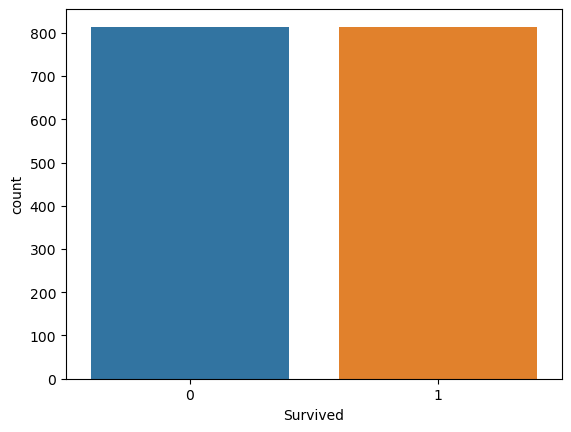

In [120]:
sns.countplot(x = 'Survived', data=ds, order = dataset['Survived'].value_counts().index)

In [121]:
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [122]:
gender = {"male":0,'female':1}
dataset['Sex'] = df['Sex'].map(gender)

In [123]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1304,0,3,0,29.813202,0,0,8.0500,S
1305,1,1,1,39.000000,0,0,108.9000,C
1306,0,3,0,38.500000,0,0,7.2500,S
1307,0,3,0,29.813202,0,0,8.0500,S


In [124]:
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [125]:
place = {"S":0,"C":1,"Q":2}
dataset['Embarked'] = dataset['Embarked'].map(place)

In [126]:
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,29.813202,0,0,8.0500,0
1305,1,1,1,39.000000,0,0,108.9000,1
1306,0,3,0,38.500000,0,0,7.2500,0
1307,0,3,0,29.813202,0,0,8.0500,0


In [127]:
dataset.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
5,0,3,0,29.813202,0,0,8.4583,2
6,0,1,0,54.000000,0,0,51.8625,0
7,0,3,0,2.000000,3,1,21.0750,0
8,1,3,1,27.000000,0,2,11.1333,0
9,1,2,1,14.000000,1,0,30.0708,1


In [129]:
x = dataset.iloc[:,1:7].values
y = dataset.iloc[:,0].values

In [130]:
x

array([[ 3.       ,  0.       , 22.       ,  1.       ,  0.       ,
         7.25     ],
       [ 1.       ,  1.       , 38.       ,  1.       ,  0.       ,
        71.2833   ],
       [ 3.       ,  1.       , 26.       ,  0.       ,  0.       ,
         7.925    ],
       ...,
       [ 3.       ,  0.       , 38.5      ,  0.       ,  0.       ,
         7.25     ],
       [ 3.       ,  0.       , 29.8132023,  0.       ,  0.       ,
         8.05     ],
       [ 3.       ,  0.       , 29.8132023,  1.       ,  1.       ,
        22.3583   ]])

In [131]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [133]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (914, 6)
y_train:  (914,)
x_test:  (392, 6)
y_test:  (392,)


# logic regression

In [134]:
model_lr = LogisticRegression(max_iter = 600)

In [135]:
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=600)

In [136]:
y_pred_lr = model_lr.predict(x_test)

In [137]:
print("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.875


# KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
model_knn = KNeighborsClassifier()

In [140]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [141]:
y_pred_knn = model_knn.predict(x_test)

In [142]:
print("Accuracy : ", accuracy_score(y_test, y_pred_knn))

Accuracy :  0.7117346938775511


# DECISION TREE

In [144]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
model_dt = DecisionTreeClassifier()

In [146]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [147]:
y_pred_dt = model_dt.predict(x_test)

In [148]:
print("Accuracy : ", accuracy_score(y_test, y_pred_dt))

Accuracy :  0.8290816326530612


# NAIVE BAYES

In [149]:
from sklearn.naive_bayes import GaussianNB

In [150]:
model_nb = GaussianNB()

In [151]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [152]:
y_pred_nb = model_nb.predict(x_test)

In [153]:
print("Accuracy : ", accuracy_score(y_test, y_pred_nb))

Accuracy :  0.8596938775510204


# SVM

In [154]:
from sklearn.svm import SVC

In [155]:
model_svc = SVC(gamma='auto')

In [156]:
model_svc.fit(x_train,y_train)

SVC(gamma='auto')

In [157]:
y_pred_svc = model_nb.predict(x_test)

In [158]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8596938775510204


# RANDOM FOREST

In [159]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [161]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [162]:
y_pred_rf = model_nb.predict(x_test)

In [163]:
print("Accuracy : ", accuracy_score(y_test, y_pred_svc))

Accuracy :  0.8596938775510204


# PREDICTION

In [171]:
Xnew = [[1,1,39.0,1,0,7.2]]

ynew = model_lr.predict(Xnew)

print(ynew)

[1]


In [167]:
y_test

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [168]:
y_pred_dt

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [169]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
1304,0,3,0,29.813202,0,0,8.0500,0
1305,1,1,1,39.000000,0,0,108.9000,1
1306,0,3,0,38.500000,0,0,7.2500,0
1307,0,3,0,29.813202,0,0,8.0500,0
